### **Aluna**: Lais de Souza Ziegler
# 🛳️ Predição de sobrevivência em Naufrágio
Dataset: treino.csv

O projeto de predição de sobrevivência em naufrágios utiliza um conjunto de dados inspirado em um incidente recente no Mediterrâneo, contendo informações sobre 7.124 passageiros a bordo de um navio. As variáveis incluem identificação única do passageiro, nome, informações da cabine (deck, número e posição), procedência, destino, idade, status de VIP, modalidade de hospedagem e gastos com serviços a bordo. O objetivo é prever a probabilidade de um passageiro sobreviver ao naufrágio com base em suas características.

### 1️⃣ Leitura e exploração dos dados
---
#### Importando as bibliotecas necessárias para a análise de dados

In [327]:
# Pacotes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes do Scikit-learn para acesso a datasets, preparação, modelagem e avaliação
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score, auc 

# Pacotes para modelos de aprendizado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder

#### Carregando o conjunto de dados a partir de um arquivo CSV 
- Em seguida, imprimindo os tipos de dados de cada coluna para entender a estrutura do DataFrame
- Exibindo as primeiras cinco linhas do conjunto de dados para uma visão geral dos dados

In [328]:
df = pd.read_csv("treino.csv")

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   IDpassageiro   1000 non-null   object
 1   Nome           1000 non-null   object
 2   Deck           1000 non-null   object
 3   NumeroCabine   1000 non-null   int64 
 4   PosicaoCabine  1000 non-null   object
 5   Procedencia    1000 non-null   object
 6   Destino        1000 non-null   object
 7   Idade          1000 non-null   int64 
 8   VIP            1000 non-null   bool  
 9   AllInclusive   1000 non-null   bool  
 10  ServicoCabine  1000 non-null   int64 
 11  Restaurante    1000 non-null   int64 
 12  Shopping       1000 non-null   int64 
 13  SPA            1000 non-null   int64 
 14  ParquedeAguas  1000 non-null   int64 
 15  Sobrevivente   1000 non-null   bool  
dtypes: bool(3), int64(7), object(6)
memory usage: 104.6+ KB


,IDpassageiro,Nome,Deck,NumeroCabine,PosicaoCabine,Procedencia,Destino,Idade,VIP,AllInclusive,ServicoCabine,Restaurante,Shopping,SPA,ParquedeAguas,Sobrevivente
0,5647_02,Chabih Matoltuble,D,193,P,Finland,Peru,61,False,True,239,1288,3380,1158,587,True
1,0107_01,Coobix Hart,A,1202,S,Argentina,Argentina,31,True,False,466,6,11299,1598,506,True
2,4158_01,Doryn Noeley,G,107,P,Peru,China,49,True,True,1240,674,10989,806,463,True
3,1316_01,Sadrus Quelfly,G,545,S,Indonesia,Greenland,32,False,True,176,1186,8750,1438,379,True
4,9069_05,Mirfark Taketiatim,D,392,P,Indonesia,Brazil,5,False,False,90,1318,161,2853,203,True


#### Exibindo a forma do DataFrame, que retorna o número de linhas e colunas, 

In [329]:
print(df.shape)

(1000, 16)


#### Exibindo um resumo estatístico das colunas numéricas do DataFrame

In [330]:
df.describe()

,NumeroCabine,Idade,ServicoCabine,Restaurante,Shopping,SPA,ParquedeAguas
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,688.466000,39.816000,883.92700,690.624000,7410.141000,1518.977000,356.879000
std,404.869011,23.346203,498.44474,419.069741,4413.046425,861.974722,202.812532
min,1.000000,0.000000,4.00000,3.000000,2.000000,0.000000,0.000000
25%,332.750000,19.000000,473.50000,312.750000,3666.750000,797.750000,184.000000
50%,675.000000,40.000000,878.00000,680.000000,7309.000000,1472.500000,365.500000
75%,1049.500000,61.000000,1297.50000,1045.500000,11279.750000,2297.500000,532.000000
max,1365.000000,79.000000,1741.00000,1425.000000,15234.000000,2955.000000,705.000000


### Verificando se há valores ausentes

In [331]:
df.isnull().sum()

IDpassageiro     0
Nome             0
Deck             0
NumeroCabine     0
PosicaoCabine    0
Procedencia      0
Destino          0
Idade            0
VIP              0
AllInclusive     0
ServicoCabine    0
Restaurante      0
Shopping         0
SPA              0
ParquedeAguas    0
Sobrevivente     0
dtype: int64

1. Visão Geral das Colunas e Tipos de Dados:
2. Valores Ausentes:
3. Duplicatas:
4. Resumo Estatístico das Variáveis Numéricas:
5. Distribuição das Variáveis Categoricas
6. Distribuição de Idades
7. Gráficos de Barras para Variáveis Categóricas:
8. Gráfico de Sobrevivência: 

## Análise de Passageiros em Família e Solo
Identificar se os passageiros se estão viajando sozinhos ou em grupo (família) com base em um identificador fornecido.

- Separar o ID de Grupo e o Número do Integrante
    - Dividimos o identificador único de cada passageiro (`IDpassageiro`) em duas partes: o grupo ao qual o passageiro pertence e o número de cada integrante dentro desse grupo. Isso nos permite rastrear quantos passageiros fazem parte de cada grupo.

- Identificar se o Passageiro está em Família
    - Com a contagem de passageiros por grupo, marcamos os passageiros que pertencem a grupos com mais de um integrante como "Em Grupo", e os demais como "Solo".


In [332]:
df[['Grupo', 'Integrante']] = df['IDpassageiro'].str.split('_', expand=True)

group_counts = df['Grupo'].value_counts()

df['EmGrupo'] = df['Grupo'].apply(lambda x: 1 if group_counts[x] > 1 else 0)

print(df.EmGrupo.value_counts())

EmGrupo
0    895
1    105
Name: count, dtype: int64


### Visualizar a Distribuição de Passageiros em Família e Solo
Gráfico de barras para mostrar visualmente a quantidade de passageiros que viajam sozinhos em comparação aos que viajam em grupo, facilitando a análise da distribuição entre esses dois tipos de passageiros.

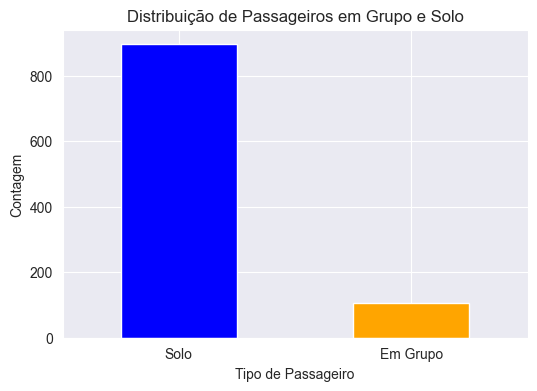

In [333]:
plt.figure(figsize=(6, 4))
df['EmGrupo'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xticks(ticks=[0, 1], labels=['Solo', 'Em Grupo'], rotation=0)
plt.title('Distribuição de Passageiros em Grupo e Solo')
plt.xlabel('Tipo de Passageiro')
plt.ylabel('Contagem')
plt.show()

### Visualizar a Distribuição de Passageiros por Deck
Mostrando visualmente a quantidade de passageiros em cada Deck do navio.

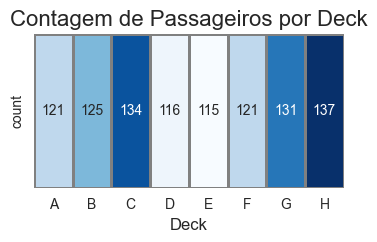

In [334]:
deck_counts = df['Deck'].value_counts().reset_index()
deck_counts_sorted = deck_counts.sort_values(by='Deck', ascending=True)
deck_counts.columns = ['Deck', 'Contagem']

plt.figure(figsize=(4, 2))
sns.heatmap(deck_counts_sorted.set_index('Deck').T, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=1, linecolor='gray')

plt.title('Contagem de Passageiros por Deck', fontsize=16)
plt.xlabel('Deck', fontsize=12)
plt.show()

### Visualizar a Distribuição de Passageiros e a Posição da Cabine
Mostrando visualmente a quantidade de passageiros em cada Deck do navio.

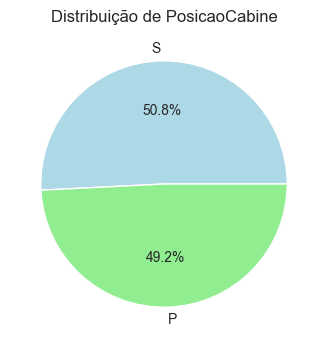

In [335]:
plt.figure(figsize=(6, 4))
df['PosicaoCabine'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribuição de PosicaoCabine')
plt.ylabel('') 
plt.show()

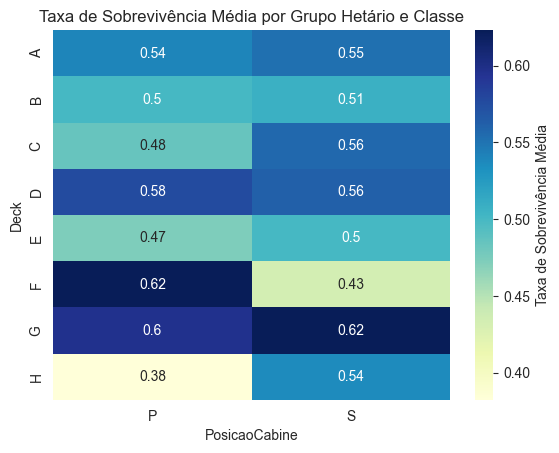

In [336]:
pivot_table = df.pivot_table(values="Sobrevivente", index="Deck", columns="PosicaoCabine", aggfunc="mean")
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Taxa de Sobrevivência Média'})
plt.title("Taxa de Sobrevivência Média por Grupo Hetário e Classe")
plt.show()

## Preparação de Dados

- **Codificação de variáveis**
   - `Deck` foi transformado em códigos numéricos.
   - `PosicaoCabine` foi mapeada para 1 (P) e 0 (S).
   - Colunas booleanas (`VIP`, `AllInclusive`, `Sobrevivente`) foram convertidas para 0 e 1.

- **Criação de novas colunas**
   - `TotalGasto` foi calculado somando os gastos em diferentes categorias.
   - `GrupoHetario` e `RangeGasto` foram criados para agrupar idade e gastos em faixas.

- **Conversão para códigos numéricos**: 
   - `GrupoHetario` e `RangeGasto` foram convertidos para valores numéricos.

- **Origem e destino**:
   - `MesmaOrigemDestino` foi criada para indicar se a procedência e destino são iguais.

- **Remoção de colunas**: 
   - Colunas de gastos individuais foram removidas.
   - Colunas desnecessárias e dados redundantes


In [337]:
df['Deck'] = df['Deck'].astype('category').cat.codes
df['PosicaoCabine'] = df['PosicaoCabine'].map({'P': 1, 'S': 0})

df['VIP'] = df['VIP'].astype(int)
df['AllInclusive'] = df['AllInclusive'].astype(int)
df['Sobrevivente'] = df['Sobrevivente'].astype(int)

df['TotalGasto'] = df[['ServicoCabine', 'Restaurante', 'Shopping', 'SPA', 'ParquedeAguas']].sum(axis=1)

df['GrupoHetario'] = pd.cut(df['Idade'], bins=[-1, 18, 30, 50, 100], labels=["0-18", "19-30", "31-50", "51+"])
df['RangeGasto'] = pd.cut(df['TotalGasto'], bins=[-1, 500, 1000, 2000, 5000, 10000, 30000], labels = ['0-500', '501-1000', '1001-2000', '2001-5000', '5001-10000', '10000+'], right=False)

df['GrupoHetarioCode'] = df['GrupoHetario'].cat.codes
df['RangeGastoCode'] = df['RangeGasto'].cat.codes

df['MesmaOrigemDestino'] = (df['Procedencia'] == df['Destino']).astype(int)

C:\Users\Lais_Ziegler\AppData\Local\Temp\ipykernel_32672\2339427600.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(values="Sobrevivente", index="GrupoHetario", columns="VIP", aggfunc="mean")


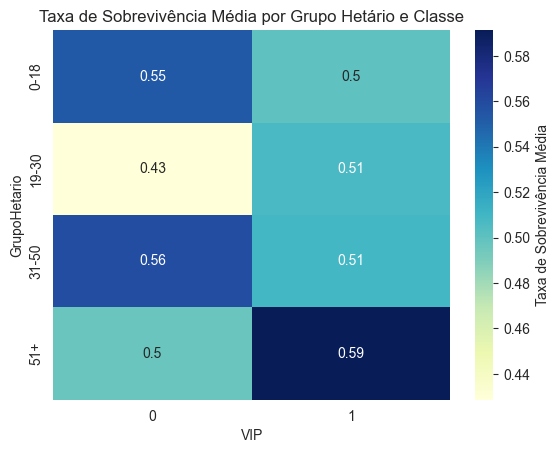

In [338]:
pivot_table = df.pivot_table(values="Sobrevivente", index="GrupoHetario", columns="VIP", aggfunc="mean")
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Taxa de Sobrevivência Média'})
plt.title("Taxa de Sobrevivência Média por Grupo Hetário e Classe")
plt.show()

In [339]:
df.drop(['ServicoCabine', 'Restaurante', 'Shopping', 'SPA', 'ParquedeAguas', 'IDpassageiro', 'Nome', 'Procedencia', 'Destino', 'NumeroCabine', 'GrupoHetario', 'RangeGasto', 'TotalGasto'], axis=1, inplace=True)

#### Separando os atributos do conjunto de dados em variáveis independentes (X) e a variável dependente (y).
- As variáveis independentes são todas as colunas do DataFrame, exceto 'Sobrevivente', que é removida. 
- A variável dependente 'Sobrevivente' é isolada em y.

#### Dividir os dados em conjuntos de treinamento e teste

In [340]:
X = df.drop(["Sobrevivente"], axis=1)
y = df["Sobrevivente"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Modelo 1: Regressão Logística
### Análise e ajuste dos hiper-parâmetros da Regressão Logística
- Escalonando os dados (normalizando para ter média 0 e desvio padrão 1)

In [341]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'saga'],
    'max_iter': [100, 500, 1000]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Acurácia: {grid_search.best_score_}")

Melhores parâmetros: {'C': 10, 'max_iter': 100, 'solver': 'lbfgs'}
Acurácia: 0.5228571428571428


- Definição de parâmetros
- Treinando o modelo
- Fazendo as previsões
- Calculando acurácia no conjunto de treino
- Exibindo a acurácia

In [342]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000, C=0.1)
logreg.fit(X_train_scaled, y_train)
Y_pred = logreg.predict(X_test_scaled)
acc_log = round(logreg.score(X_train_scaled, y_train) * 100, 2)
print(f'Acurácia no conjunto de treino: {acc_log}%')

Acurácia no conjunto de treino: 55.14%


In [343]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.54      0.30      0.38       145
           1       0.54      0.77      0.63       155

    accuracy                           0.54       300
   macro avg       0.54      0.53      0.51       300
weighted avg       0.54      0.54      0.51       300



### Modelo 2: Árvores de Decisão
### Análise e ajuste dos hiper-parâmetros de Árvores de Decisão
- Escalonando os dados

In [344]:
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Melhores parâmetros:", grid_search.best_params_)

Melhores parâmetros: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [345]:
decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=5)
decision_tree.fit(X_train, y_train)
acc_decision_tree_train = round(decision_tree.score(X_train, y_train) * 100, 2)
# acc_decision_tree_test = round(decision_tree.score(X_test, y_test) * 100, 2)
print(f"Acurácia no conjunto de treino: {acc_decision_tree_train}%")
# print(f"Acurácia no conjunto de teste: {acc_decision_tree_test}%")

Acurácia no conjunto de treino: 71.57%


### Modelo 3: K-Nearest Neighbors
### Análise e ajuste dos hiper-parâmetros do KNN

In [346]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

77.29

### Modelo 4: Gaussian Naive Bayes
### Análise e ajuste dos hiper-parâmetros da Naive Bayes

In [347]:
NBclassifier1 = GaussianNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print('Matriz de confusão: ')
print(confusion_matrix(y_test, y_pred))
acc_gaussian = round(NBclassifier1.score(X_train, y_train) * 100, 2)
NBAcc1 = accuracy_score(y_pred,y_test)
print('Acurácia do algoritmo de Naive Bayes: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

           0       0.60      0.23      0.34       145
           1       0.54      0.85      0.66       155

    accuracy                           0.55       300
   macro avg       0.57      0.54      0.50       300
weighted avg       0.57      0.55      0.51       300

Matriz de confusão: 
[[ 34 111]
 [ 23 132]]
Acurácia do algoritmo de Naive Bayes: 55.33%


### Modelo 5: Random Forest
### Análise e ajuste dos hiper-parâmetros de Random Foest

In [348]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf.fit(X_train, y_train)
acc_rf_train = round(rf.score(X_train, y_train) * 100, 2)
# acc_rf_test = round(rf.score(X_test, y_test) * 100, 2)
print(f"Acurácia no conjunto de treino (Random Forest): {acc_rf_train}%")
# print(f"Acurácia no conjunto de teste (Random Forest): {acc_rf_test}%")

Acurácia no conjunto de treino (Random Forest): 78.0%


In [349]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Gaussian Naive Bayes',
              'Decision Tree'],
    'Score': [acc_knn, acc_log, 
              acc_rf_train, acc_gaussian,
             acc_decision_tree_train]})
models.sort_values(by='Score', ascending=False)

# Add curva ROC (19)
# ajustar hiper parametros

,Model,Score
2,Random Forest,78.00
0,KNN,77.29
4,Decision Tree,71.57
1,Logistic Regression,55.14
3,Gaussian Naive Bayes,53.86
